# Sentiment Scoring using Textblob

In [1]:
# pip install -U textblob-de
# python -m textblob.download_corpora
from textblob_de import TextBlobDE as TextBlob
import pandas as pd

#### Load Data

In [2]:
yelp = pd.read_csv('cleaned_data_yelp.csv')
yelp.head()

,Comment,Rating
0,bewertung restaurant menulist ansehen restaura...,5
1,joseph ziemlich neu israelisch restaurant mode...,4
2,schalömch scheiße heute kosch weggeknallt mari...,5
3,essen allenfalls ok nochmal insgesamt erlebnis...,2
4,empfehlung werden enttäuschen hammer ambiente ...,5


#### Compute sentiment score per comment

In [3]:
def compute_sentiscore(text):
    blob=TextBlob(text)
    polarity = blob.sentiment.polarity
    return polarity
yelp['Senti_Blob'] = yelp['Comment'].apply(lambda x: compute_sentiscore(x))

#### Scale Sentiblob to Rating Range 1-5

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,5))
# Create Array with specific dimension requirements to make scaler happy
senti_blob_ar= (yelp['Senti_Blob'].values).reshape(-1, 1)
Senti_Blob_scaled = pd.DataFrame(scaler.fit_transform(senti_blob_ar),columns=['Senti_norm'])
senti_blob = pd.DataFrame(yelp['Senti_Blob'])
yelp = pd.concat([yelp,Senti_Blob_scaled],axis=1)


#### Comparison Rating vs. TextBlob Sentiscore

<AxesSubplot: ylabel='Frequency'>

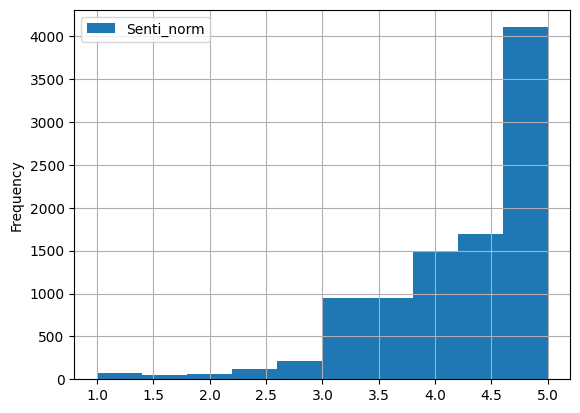

In [5]:
Senti_Blob_scaled.plot.hist(grid=True, bins=10)


<AxesSubplot: ylabel='Frequency'>

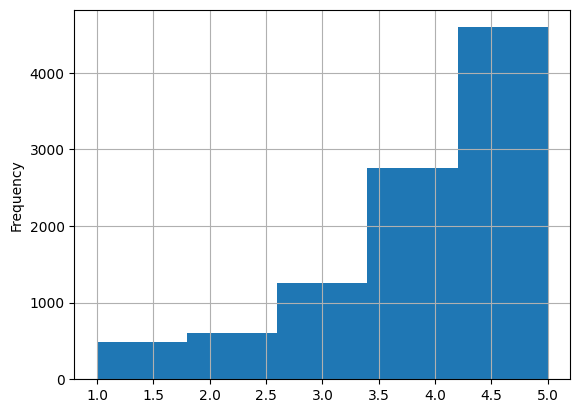

In [6]:
yelp['Rating'].plot.hist(grid=True, bins=5)

In [7]:
yelp.to_csv('yelp_cleaned_sentiscored.csv',header=True, index=False)